#Q1.Explain the differences between AI, ML, Deep Learning (DL), and DataScience (DS).
 =Artificial Intelligence (AI):
A broad field of computer science focused on building systems that can mimic human intelligence. It includes reasoning, decision-making, perception, natural language understanding, and problem-solving.
Example: Self-driving cars, chatbots.

Machine Learning (ML):
A subset of AI that allows machines to learn from data and improve performance over time without explicit programming. ML is about designing algorithms that generalize patterns from examples.
Example: Email spam classification.

Deep Learning (DL):
A specialized branch of ML that uses neural networks with many layers to automatically learn hierarchical features from raw data. Especially effective in large, complex datasets such as images, audio, and text.
Example: Face recognition using convolutional neural networks.

Data Science (DS):
A multidisciplinary field that deals with extracting meaningful insights from data. It combines statistics, data analysis, visualization, and ML to support business decision-making.
Example: Analyzing customer purchase patterns to recommend new products.

#Q2.What are the types of machine learning? Describe each with one real-world example?
=Supervised learning: Train on labeled data (features → target).
Example: Predicting home prices from area, rooms, location (regression).

Unsupervised learning: Discover structure in unlabeled data.
Example: Customer segmentation with K-Means.

Semi-supervised learning: Few labels + many unlabeled samples.
Example: Classifying product images when only 5% are labeled.

Self-supervised learning: Create proxy labels from the data itself to learn representations.
Example: Masked language modeling (BERT) on text.

Reinforcement learning: Agent learns actions by rewards/penalties.
Example: Dynamic ad bidding to maximize ROI.

Online learning (streaming): Model updates continuously with incoming data.
Example: Real-time click-through rate prediction.


#Q3.Define overfitting, underfitting, and the bias-variance tradeoff in machine learning?
=Underfitting: Model too simple → high training & test error (high bias, low variance).

Overfitting: Model too complex, memorizes noise → low training error but high test error (low bias, high variance).

Bias–variance tradeoff: As complexity increases, bias decreases and variance increases. Aim for the “sweet spot” with lowest validation error using regularization, early stopping, ensembling, and proper cross-validation.


#Q4.What are outliers in a dataset, and list three common techniques for handling them?
=Outliers are values that deviate markedly from the bulk of the data—due to errors, rare events, or natural heavy tails.

Techniques (pick according to context):

IQR capping (winsorization): Clip beyond [Q1−1.5·IQR, Q3+1.5·IQR].

Z-score/robust transforms: Log/Box-Cox transform; use median/IQR or RobustScaler.

Filtering/flagging: Drop clear measurement errors or add an is_outlier flag; prefer robust models (trees).

#Q5.Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data?
=Audit missingness (MCAR/MAR/MNAR) → decide per feature (drop vs impute) → impute on train only (avoid leakage) → add “was_missing” indicator if useful → validate impact.

Numerical imputation (example): Median (robust to outliers).

Categorical imputation (example): Most frequent (mode) or a dedicated "Unknown" category.


In [3]:
#Q6. Write a Python program that: Creates a synthetic imbalanced dataset with make_classification() from sklearn.datasets.Prints the class distribution
from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=3, n_redundant=1,
    n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=42
)
print("Class distribution:", Counter(y))

Class distribution: Counter({np.int64(0): 950, np.int64(1): 50})


In [4]:
#Q7.Implement one-hot encoding using pandas for the following list of colors:['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.
import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame({'color': colors})
oh = pd.get_dummies(df['color'])
print(oh)
#    Blue  Green  Red
# 0     0      0    1
# 1     0      1    0
# 2     1      0    0
# 3     0      1    0
# 4     0      0    1


    Blue  Green    Red
0  False  False   True
1  False   True  False
2   True  False  False
3  False   True  False
4  False  False   True


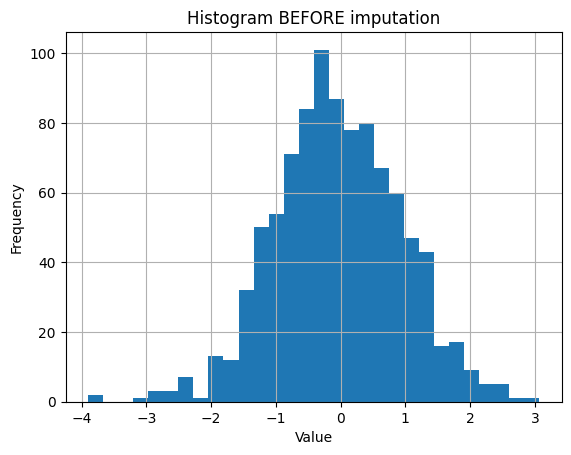

Imputation mean used: -0.0464


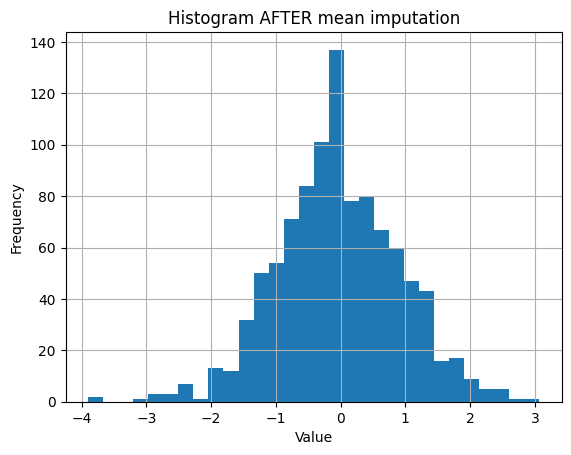

In [5]:
#Q8.Write a Python script to:● Generate 1000 samples from a normal distribution.● Introduce 50 random missing values.● Fill missing values with the column mean.● Plot a histogram before and after imputation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) generate normal data
rng = np.random.default_rng(0)
samples = rng.normal(loc=0, scale=1, size=1000).astype(float)

# 2) introduce 50 missing values at random positions
idx = rng.choice(len(samples), size=50, replace=False)
samples_nan = samples.copy()
samples_nan[idx] = np.nan

# 3) plot histogram BEFORE imputation
plt.figure()
pd.Series(samples_nan).hist(bins=30)
plt.title("Histogram BEFORE imputation")
plt.xlabel("Value"); plt.ylabel("Frequency")
plt.show()

# 4) mean imputation
mean_val = np.nanmean(samples_nan)
imputed = np.where(np.isnan(samples_nan), mean_val, samples_nan)
print(f"Imputation mean used: {mean_val:.4f}")

# 5) plot histogram AFTER imputation
plt.figure()
pd.Series(imputed).hist(bins=30)
plt.title("Histogram AFTER mean imputation")
plt.xlabel("Value"); plt.ylabel("Frequency")
plt.show()


In [6]:
#Q9.Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.
import numpy as np
from sklearn.preprocessing import MinMaxScaler

nums = np.array([2, 5, 10, 15, 20], dtype=float).reshape(-1, 1)
scaled = MinMaxScaler().fit_transform(nums).flatten()
print("Original:", nums.flatten())
print("Scaled:", scaled)
# Original: [ 2.  5. 10. 15. 20.]
# Scaled:   [0.   0.17647059 0.47058824 0.76470588 1.        ]


Original: [ 2.  5. 10. 15. 20.]
Scaled: [0.         0.16666667 0.44444444 0.72222222 1.        ]


In [8]:
#Q10.You are working as a data scientist for a retail company. You receive a customertransaction dataset that contains:● Missing ages,● Outliers in transaction amount,● A highly imbalanced target (fraud vs. non-fraud),● Categorical variables like paymon plan you’d follow before training a machine learning model. Include how you’d address missing data, outliers, imbalance, and encoding.import numpy as np, pandas as pd
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

# --- synthetic example ---
rng = np.random.default_rng(7); n = 200
ages = rng.integers(18, 70, size=n).astype(float)
ages[rng.choice(n, 20, replace=False)] = np.nan                  # missing ages
amount = rng.normal(2000, 500, size=n)
amount[rng.choice(n, 5, replace=False)] *= 8                     # extreme outliers
fraud = np.zeros(n, dtype=int)
fraud[rng.choice(n, 12, replace=False)] = 1                      # ~6% fraud
pay = rng.choice(["Card","UPI","Cash","Wallet"], size=n, p=[.5,.3,.15,.05])

df = pd.DataFrame({"age": ages, "amount": amount, "payment_method": pay, "fraud": fraud})
print("Head:\n", df.head())

# 1) Missing ages → median impute
age_med = df["age"].median()
df["age"] = df["age"].fillna(age_med)
print(f"\nFilled missing ages with median={age_med:.1f}. Remaining missing ages: {df['age'].isna().sum()}")

# 2) Outliers → IQR capping winsorization on 'amount'
Q1, Q3 = df["amount"].quantile(.25), df["amount"].quantile(.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
before = ((df["amount"] < lower) | (df["amount"] > upper)).sum()
df["amount_capped"] = df["amount"].clip(lower, upper)
after = ((df["amount_capped"] < lower) | (df["amount_capped"] > upper)).sum()
print(f"Outliers before: {before}, after capping: {after}")

# 3) Imbalance → class weights (example; or use SMOTE/undersampling)
classes = np.array([0,1])
weights = compute_class_weight("balanced", classes=classes, y=df["fraud"])
print("Class distribution:", Counter(df["fraud"]))
print("Class weights:", dict(zip(classes, weights)))

# 4) Encoding categoricals
df_enc = pd.get_dummies(df, columns=["payment_method"], drop_first=True)
print("Encoded cols:", [c for c in df_enc.columns if c.startswith("payment_method_")])

# Final features (example)
X = df_enc[["age","amount_capped"] + [c for c in df_enc.columns if c.startswith("payment_method_")]]
y = df_enc["fraud"]
print("X shape:", X.shape, "| y shape:", y.shape)
print(X.head())


Head:
     age       amount payment_method  fraud
0  67.0  2096.372956           Card      0
1  50.0  2044.653243           Card      0
2  53.0  1704.485824           Card      0
3  64.0  1940.695088            UPI      0
4  48.0  1001.126854           Card      0

Filled missing ages with median=44.0. Remaining missing ages: 0
Outliers before: 6, after capping: 0
Class distribution: Counter({0: 188, 1: 12})
Class weights: {np.int64(0): np.float64(0.5319148936170213), np.int64(1): np.float64(8.333333333333334)}
Encoded cols: ['payment_method_Cash', 'payment_method_UPI', 'payment_method_Wallet']
X shape: (200, 5) | y shape: (200,)
    age  amount_capped  payment_method_Cash  payment_method_UPI  \
0  67.0    2096.372956                False               False   
1  50.0    2044.653243                False               False   
2  53.0    1704.485824                False               False   
3  64.0    1940.695088                False                True   
4  48.0    1001.126854     